In [28]:
# https://youtu.be/wwhJ32al364 을 보고 실행함

In [1]:
!pip install sentence_transformers

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

sentences = ["안녕하세요?", "한국어 문장 임베딩을 위한 버트 모델입니다."]
embeddings = model.encode(sentences)
print(embeddings)

[[-0.37510452 -0.77338415  0.5927712  ...  0.5792351   0.32683474
  -0.6508966 ]
 [-0.0936171  -0.18191504 -0.19230828 ... -0.03165768  0.3041256
  -0.26793614]]


In [4]:
from sklearn.cluster import KMeans

In [5]:
# Corpus with example sentences
sentences = ['한 남자가 음식을 먹는다.',
            '한 남자가 빵 한 조각을 먹는다.',
            '그 여자가 아이를 돌본다.',
            '한 남자가 말을 탄다.',
            '한 여자가 바이올린을 연주한다.',
            '두 남자가 수레를 숲 속으로 밀었다.',
            '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
            '원숭이 한 마리가 드럼을 연주한다.',
            '치타 한 마리가 먹이 뒤에서 달리고 있다.',
            '한 남자가 파스타를 먹는다.',
            '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
            '치타가 들판을 가로 질러 먹이를 쫓는다.']

embeddings = model.encode(sentences)

#Then, we perform k-means clustering using sklearn:

num_clusters = 5                                 #5개의 군집으로 나누겠다.
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[]for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(sentences[sentence_id])
    
for i, cluster in enumerate(clustered_sentences):
    print("Cluster", i+1)
    print(cluster)
    print("")
#서로 관련된 관련이 있는 문장끼리 묶여서 출력된다.    

Cluster 1
['한 남자가 음식을 먹는다.', '한 남자가 빵 한 조각을 먹는다.', '한 남자가 파스타를 먹는다.']

Cluster 2
['한 남자가 말을 탄다.', '두 남자가 수레를 숲 속으로 밀었다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster 3
['그 여자가 아이를 돌본다.']

Cluster 4
['치타 한 마리가 먹이 뒤에서 달리고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']

Cluster 5
['한 여자가 바이올린을 연주한다.', '원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']



# 어몽러스 리뷰 직접크롤링하기 - 스팀

In [6]:
import requests
import time

def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+str(appid), params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

def get_n_reviews(appid, n=100): #게임 url에 (appid/1245620가 appid)라는 게임을 100개 크롤링하겟/다
    reviews = []
    cursor = '*'
    params = {
        'json' : 1,                         #파라미터는 json으로 받을꺼다
        'filter' : 'all',                   #모든 리뷰
        'language' : 'koreana',             #한글
        'day_range' : 9223372036854775807,  #몇일간의 리뷰? 전체
        'review_type' : 'all',
        'purchase_type' : 'all'
    }


    while n > 0:
        time.sleep(2)
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [7]:
# Steam 홈페이지 AmongUs 코드 945360
reviews = get_n_reviews(945360, 10000)  

reviews[:5]

[{'recommendationid': '80347726',
  'author': {'steamid': '76561198154693836',
   'num_games_owned': 2942,
   'num_reviews': 21,
   'playtime_forever': 2570,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 1986,
   'last_played': 1610861968},
  'language': 'koreana',
  'review': '왜 성인에게만 투표권이 주어지는지 이유를 알겠니? ^^',
  'timestamp_created': 1606405191,
  'timestamp_updated': 1606405191,
  'voted_up': True,
  'votes_up': 931,
  'votes_funny': 200,
  'weighted_vote_score': '0.969511866569519043',
  'comment_count': 38,
  'steam_purchase': False,
  'received_for_free': False,
  'written_during_early_access': False},
 {'recommendationid': '74374387',
  'author': {'steamid': '76561198046801513',
   'num_games_owned': 188,
   'num_reviews': 11,
   'playtime_forever': 2931,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 1072,
   'last_played': 1639378264},
  'language': 'koreana',
  'review': '급식들에게 투표권을 주면 안되는 이유',
  'timestamp_created': 1597534832,
  'timestamp_updated': 1597

In [9]:
import pandas as pd

In [10]:
df=pd.DataFrame.from_dict(reviews)
df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,timestamp_dev_responded,developer_response
0,80347726,"{'steamid': '76561198154693836', 'num_games_ow...",koreana,왜 성인에게만 투표권이 주어지는지 이유를 알겠니? ^^,1606405191,1606405191,True,931,200,0.969511866569519043,38,False,False,False,NaN,NaN
1,74374387,"{'steamid': '76561198046801513', 'num_games_ow...",koreana,급식들에게 투표권을 주면 안되는 이유,1597534832,1597534832,True,1682,554,0.969413638114929199,0,False,False,False,NaN,NaN
2,73220655,"{'steamid': '76561198123206647', 'num_games_ow...",koreana,친구가 필요\n친구가 필요\n친구가 필요\n친구가 필요\n친구가 필요\n친구가 필요...,1595613204,1595613204,True,711,346,0.966714441776275635,30,True,False,False,NaN,NaN
3,88410385,"{'steamid': '76561198143387277', 'num_games_ow...",koreana,어째서 20살부터 투표권을 주는지 알았습니다.,1615708653,1615708653,True,329,180,0.959434390068054199,0,False,False,False,NaN,NaN
4,72146829,"{'steamid': '76561198059348915', 'num_games_ow...",koreana,할만한데 투표중에 지도좀 볼 수 있게 해줬으면,1594022318,1594022318,True,441,3,0.955497562885284424,2,True,False,False,NaN,NaN


# 전처리
## 한글이 아닌 글자 제거
## 작은 따옴표 제거
## 연속된 공백 제거
## 좌우 공백 제거
## 최대 글자 255자

In [11]:
df['review'] = df['review'] \
  .replace(r'[^가-힣 ]', ' ', regex=True) \
  .replace("'", '') \
  .replace(r'\s+', ' ', regex=True) \
  .str.strip() \
  .str[:255]

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,timestamp_dev_responded,developer_response
0,80347726,"{'steamid': '76561198154693836', 'num_games_ow...",koreana,왜 성인에게만 투표권이 주어지는지 이유를 알겠니,1606405191,1606405191,True,931,200,0.969511866569519043,38,False,False,False,NaN,NaN
1,74374387,"{'steamid': '76561198046801513', 'num_games_ow...",koreana,급식들에게 투표권을 주면 안되는 이유,1597534832,1597534832,True,1682,554,0.969413638114929199,0,False,False,False,NaN,NaN
2,73220655,"{'steamid': '76561198123206647', 'num_games_ow...",koreana,친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 ...,1595613204,1595613204,True,711,346,0.966714441776275635,30,True,False,False,NaN,NaN
3,88410385,"{'steamid': '76561198143387277', 'num_games_ow...",koreana,어째서 살부터 투표권을 주는지 알았습니다,1615708653,1615708653,True,329,180,0.959434390068054199,0,False,False,False,NaN,NaN
4,72146829,"{'steamid': '76561198059348915', 'num_games_ow...",koreana,할만한데 투표중에 지도좀 볼 수 있게 해줬으면,1594022318,1594022318,True,441,3,0.955497562885284424,2,True,False,False,NaN,NaN


# 전처리2
### 아무것도 안써있는 리뷰 제거
### 좌우 공백이 있는 자리 제거

In [12]:
df = df[df['review']. str.strip().astype(bool)]
len(df)

8743

### 마지막으로 확인

In [13]:
df['review'].values.tolist()[:5]   #이쁘게 잘 전처리가 됐다

['왜 성인에게만 투표권이 주어지는지 이유를 알겠니',
 '급식들에게 투표권을 주면 안되는 이유',
 '친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요',
 '어째서 살부터 투표권을 주는지 알았습니다',
 '할만한데 투표중에 지도좀 볼 수 있게 해줬으면']

# csv 파일로 저장

In [14]:
df.to_csv('amongus_steam_review_ko.csv', index=False)

In [15]:
 pd.read_csv('amongus_steam_review_ko.csv')

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,timestamp_dev_responded,developer_response
0,80347726,"{'steamid': '76561198154693836', 'num_games_ow...",koreana,왜 성인에게만 투표권이 주어지는지 이유를 알겠니,1606405191,1606405191,True,931,200,0.969512,38,False,False,False,NaN,NaN
1,74374387,"{'steamid': '76561198046801513', 'num_games_ow...",koreana,급식들에게 투표권을 주면 안되는 이유,1597534832,1597534832,True,1682,554,0.969414,0,False,False,False,NaN,NaN
2,73220655,"{'steamid': '76561198123206647', 'num_games_ow...",koreana,친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 필요 친구가 ...,1595613204,1595613204,True,711,346,0.966714,30,True,False,False,NaN,NaN
3,88410385,"{'steamid': '76561198143387277', 'num_games_ow...",koreana,어째서 살부터 투표권을 주는지 알았습니다,1615708653,1615708653,True,329,180,0.959434,0,False,False,False,NaN,NaN
4,72146829,"{'steamid': '76561198059348915', 'num_games_ow...",koreana,할만한데 투표중에 지도좀 볼 수 있게 해줬으면,1594022318,1594022318,True,441,3,0.955498,2,True,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,66099985,"{'steamid': '76561198858377554', 'num_games_ow...",koreana,많이 하진 안았지만 재밌으,1585499200,1585499200,True,0,0,0.000000,0,True,False,False,NaN,NaN
8739,66008502,"{'steamid': '76561198345451146', 'num_games_ow...",koreana,재밌어요 재밌거든요 근데 그 완벽한 게임성을 가지고 서버때문에 게임을 망치는 꼬라지...,1585399503,1585399503,False,0,0,0.000000,0,False,False,False,NaN,NaN
8740,65975746,"{'steamid': '76561198090848769', 'num_games_ow...",koreana,재미는 있으나 친구들이 많 이 있어야만 재미있는게임 하지만 너무하다보면 단순해서 범...,1585358504,1585358504,True,0,0,0.000000,0,True,False,False,NaN,NaN
8741,65934306,"{'steamid': '76561198978600398', 'num_games_ow...",koreana,꿀잼인데 계속 서버가 튕김 그래도 갓겜,1585316288,1585316288,True,0,0,0.000000,0,True,False,False,NaN,NaN


# 어몽어스 리뷰 임베딩

In [16]:
# 돌린시간: 두시간 이상
corpus = df['review'].values.tolist()      #review컬럼만 빼서 corpus변수에 넣어주고

embeddings = model.encode(corpus)          #모델인코더에 corpus를 넣어서 돌린다

embeddings[:5]


array([[ 0.25408733, -0.25447023, -0.17206411, ...,  0.34336308,
        -0.6388938 , -0.5928169 ],
       [-0.17806654, -0.32994473, -0.0293092 , ...,  0.20534936,
         0.03884128, -0.20384923],
       [-0.11429597, -0.17907077, -0.28111365, ...,  0.10649057,
         0.10379867, -0.63569534],
       [ 0.6799044 , -0.6177462 ,  0.32901502, ..., -0.0630244 ,
        -0.2118672 ,  0.23927437],
       [ 0.3470717 , -0.10488936,  0.2600311 , ...,  0.41735935,
         0.06537528, -0.01981015]], dtype=float32)

# k=3 클러스터링

In [17]:
num_clusters = 3 
clustering_model = KMeans(n_clusters = num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])
    
for i, cluster in enumerate(clustered_sentences):
    print('Cluster %d (%d)' % (i+1, len(cluster)))
    print(cluster)
    print('')

Cluster 1 (2083)
['잼몽어스', '재밌어요', '재미있어요 하지만 나는 어려워요', '정치겜', '우정파괴겜', '재밌네 이거', '똥겜', '존잼', '잼민이 천지임', '재밌어영', '재밌음', '헤헤 잼밋당', '심리전 오지네', '재밌음', '졸잼', '굿', '잼민겜', '굳굳', '굳 존잼입니다 강추 원 아깝지않다', '재미있습', '잼민이 환장에디션', '재밌네요', '역시 어몽어스 꿀잼', '꿀잼 대규모 패채 존버중', '할만합니다', '인큐가 재밌음', '망겜', '좆망겜', '개꿀잼 마피아겜', '귀여워', '발 재미있어', '너무 꿀잼임', '너무 좋다', '갓겜', '그래도 재밌음', '잼남', '와 정말 재밌다', '업데이트 쏘 굿', '대박갓겜', '진짜 개꿀잼이닷', '꿀잼허니잼', '즐겁다', '재밌어요', '잼미따', '재밌군요', '꿀잼 근데 임포가', '음 벤트쇼 씨 재미가 있다', '재밋음', '뭔가 재밌다', '굿', '재밌네', '완전 꿀잼 갓겜', '아주갓갬', '할만함', '그냥 개꿀잼', '재밌음', '좋아요', '재밋음 하셈 가격도 싸서', '굿', '아', '굿', '재미따', '굿', '히 잼밋땅', '갓겜', '재밌는데 유리서버임', '재밌슴', '너무 귀욥당', '개꿀잼', '흠냐 꿀잼', '극찬', '친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필요친구필', '뭐냐 쥰내 잼있는디', '꿀잼', '잼서', '너무 조아연', '내 촉은 완벽해', '좀 재밌네', '재밌당', '개재밌음', '갓 겜',

# 워드클라우드 그리기


## 형태소분석, 명사추출

In [18]:
from konlpy.tag import Komoran, Okt, Kkma, Hannanum
from tqdm import tqdm

extractor = Hannanum()

nouns = []

for review in tqdm(df['review'].values.tolist()):
    nouns.extend(extractor.nouns(review))
len(nouns)

100%|█████████████████████████████████████████████████████████████████████████████| 8743/8743 [00:19<00:00, 453.26it/s]


54451

In [19]:
from collections import Counter

count = Counter(nouns)
words = dict(count.most_common())

for i, (word, count) in enumerate(words.items()):
    if i > 10:
        break
        
    print(word, count)

게임 2618
서버 918
것 808
친구 750
수 710
임포스터 530
나 466
사람 441
핵 415
진짜 376
어몽어스 368


# 워드클라우드 그리기

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

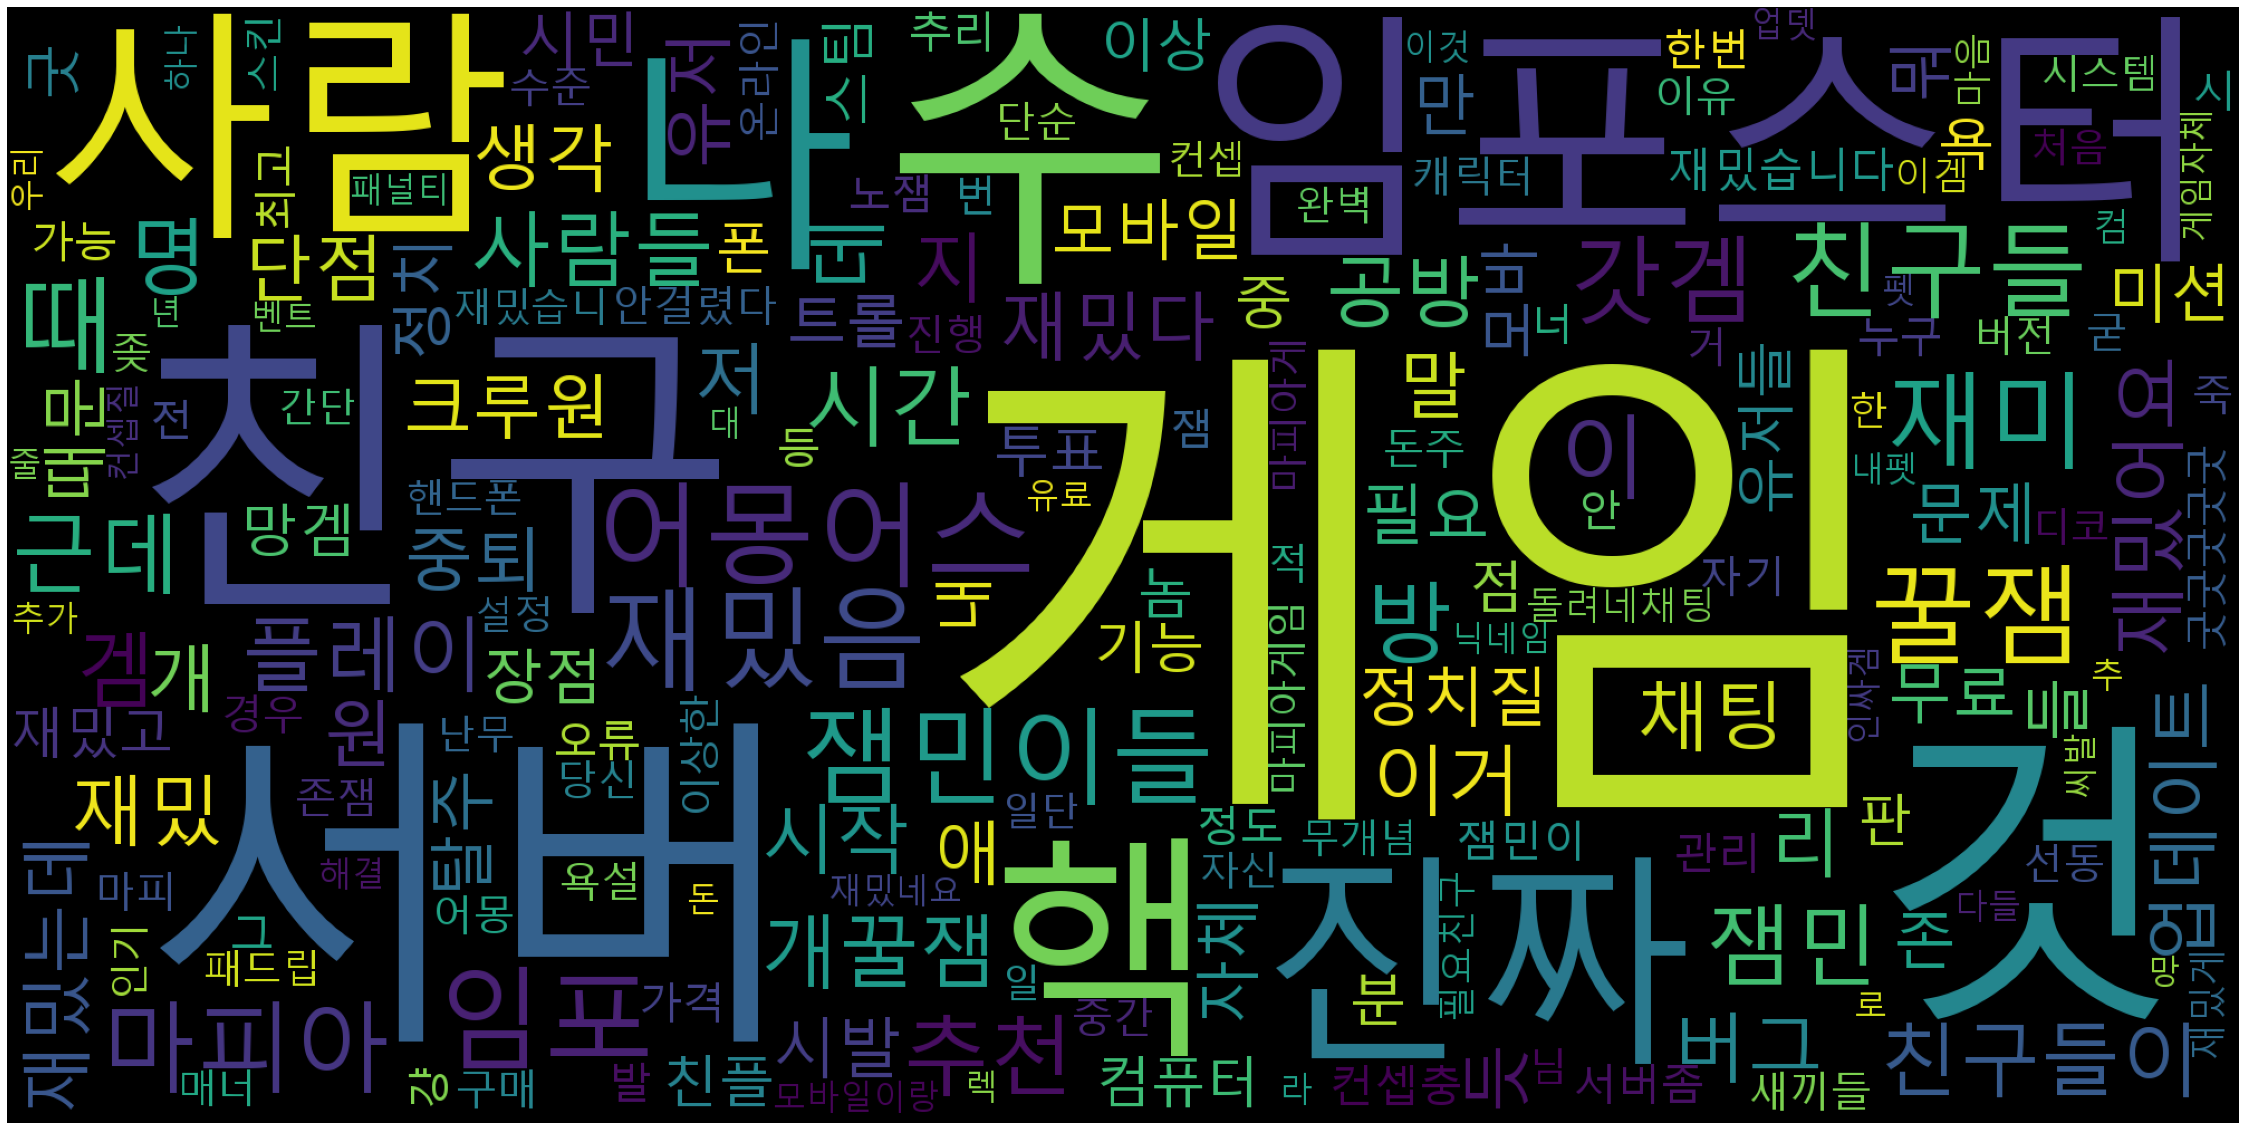

In [21]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
    width=2000,
    height=1000).generate_from_frequencies(words)

plt.figure(figsize=(40, 40))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 기타

<AxesSubplot:title={'center':'Voted up'}>

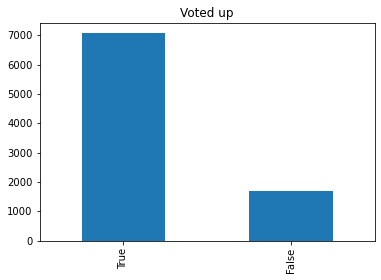

In [22]:
df['voted_up'].value_counts().plot(kind='bar', title='Voted up')
#True는 긍정, False는 부정적 

In [24]:
df.to_csv('amongus_steam_review_ko2.csv', index=False)

In [25]:
df = pd.read_csv('amongus_steam_review_ko2.csv')

In [27]:
import json

total_playtime = 0

for i in range(len(df)):
    playtime = json.loads(df.iloc[i]['author'].replace("\'", "\""))['playtime_forever']

    total_playtime += playtime

print('전체 플레이타임 합계 (분)', total_playtime)
print('전체 플레이타임 합계 (시간)', total_playtime / 60)
print('평균 플레이타임 (시간)', total_playtime / len(df) / 60)

전체 플레이타임 합계 (분) 26307571
전체 플레이타임 합계 (시간) 438459.51666666666
평균 플레이타임 (시간) 50.14977887071562


In [ ]:
# https://wikidocs.net/94748 추가해보기